# **Exploratory Data Analysis: Reported Road Accidents in Guadalajara Metropolitan Zone**

#### **1. Imports and Data Loading**

**Import modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Load data**

In [2]:
df = pd.read_csv("data.csv", encoding="cp1252")

#### **2. Data Exploration**

**Check dataset first 5 rows**

In [3]:
df.head(5)

,Unnamed: 0,consecutivo,Id,fecha,anio,mes,dia,dia_sem,rango_hora,mun,...,calle_2,x,y,tipo_siniestro,condicion_usuario,tipo_usuario,ibaen_atro,sexo,rango_edad,consecuencia
0,1,1,2015-01-01-1-EHGR-20:00 A 21:59,2015-01-01,2015,Enero,1,jueves,20:00 a 20:59,Guadalajara,...,Rio Rhin,-103.33658,20.653207,Colisión con peatón/Atropellamiento,Conductor,Motociclista,Motocicleta,Hombre,No disponible,Ileso
1,2,2,2015-01-01-1-EHGR-20:00 A 21:59,2015-01-01,2015,Enero,1,jueves,20:00 a 20:59,Guadalajara,...,Rio Rhin,-103.33658,20.653207,Colisión con peatón/Atropellamiento,Peatón,Peatón,Motocicleta,Mujer,28-37,Lesionado
2,3,3,2015-01-01-620850-SISCAV-08:00 A 09:59,2015-01-01,2015,Enero,1,jueves,09:00 a 09:59,Sin datos,...,Tlaquepaque,NaN,NaN,Colisión con objeto fijo,Conductor,Vehiculo Particular,Automovil,Hombre,18-27,Ileso
3,4,4,2015-01-01-620850-SISCAV-08:00 A 09:59,2015-01-01,2015,Enero,1,jueves,09:00 a 09:59,Sin datos,...,Tlaquepaque,NaN,NaN,Colisión con objeto fijo,Pasajero,Vehiculo Particular,Automovil,Mujer,No disponible,Lesionado
4,5,5,2015-01-01-622260-SISCAV-04:00 A 05:59,2015-01-01,2015,Enero,1,jueves,05:00 a 05:59,Guadalajara,...,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Conductor,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Hombre,38-47,Fallecido


**Inspect data types and missing values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46005 entries, 0 to 46004
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         46005 non-null  int64 
 1   consecutivo        46005 non-null  int64 
 2   Id                 46005 non-null  object
 3   fecha              46005 non-null  object
 4   anio               46005 non-null  int64 
 5   mes                46005 non-null  object
 6   dia                46005 non-null  int64 
 7   dia_sem            46005 non-null  object
 8   rango_hora         46005 non-null  object
 9   mun                46005 non-null  object
 10  calle_1            46005 non-null  object
 11  calle_2            46005 non-null  object
 12  x                  41873 non-null  object
 13  y                  41873 non-null  object
 14  tipo_siniestro     46005 non-null  object
 15  condicion_usuario  46005 non-null  object
 16  tipo_usuario       46005 non-null  objec

**Check summary statistic of numerical columns**

In [5]:
df.describe()

,Unnamed: 0,consecutivo,anio,dia
count,46005.000000,46005.000000,46005.000000,46005.000000
mean,23003.000000,23003.637496,2018.336529,15.737768
std,13280.643904,13281.396145,2.507583,8.718242
min,1.000000,1.000000,2015.000000,1.000000
25%,11502.000000,11502.000000,2016.000000,8.000000
50%,23003.000000,23003.000000,2018.000000,16.000000
75%,34504.000000,34506.000000,2020.000000,23.000000
max,46005.000000,46007.000000,2024.000000,31.000000


- We can observe that Unamed column is the index, and the year and day arent a datetime objects

**Check Count of Categorical Columns**

In [6]:
df['tipo_siniestro'].value_counts()

tipo_siniestro
Colisión entre dos o más vehículos     34726
Colisión con peatón/Atropellamiento     5372
Colisión con objeto fijo                3059
Caída del vehículo                      1271
Caída al interior                        548
Volcadura                                463
Otro                                     416
Colisión con vehículo estacionado        130
Automovil                                  6
Motocicleta                                5
Sin datos                                  4
Conductor                                  2
Camioneta De Carga                         1
Bicicleta                                  1
Colisión con obstáculo no fijo             1
Name: count, dtype: int64

- Checking the different categories we can observe that labels arent consistent, we will need to plan how to handle this so we can later perform one hot or label enconding for training our model

In [7]:
df['condicion_usuario'].value_counts()

condicion_usuario
Conductor                               31817
Pasajero                                10883
Peatón                                   3290
Hombre                                     12
Motociclista                                1
Transporte Empresarial o de Personal        1
Mujer                                       1
Name: count, dtype: int64

In [8]:
df['tipo_usuario'].value_counts()

tipo_usuario
Vehiculo Particular                     13875
Motociclista                             9505
Transporte Publico de Pasajeros          7548
Transporte de Carga                      5762
Transporte Empresarial o de Personal     3719
Peatón                                   3290
Sin datos                                1198
Ciclista                                  818
Otro Vehiculo                             217
Tren Ligero                                58
18-27                                       4
28-37                                       4
38-47                                       2
48-59                                       2
Motocicleta                                 1
Camioneta De Pasajeros                      1
0-17                                        1
Name: count, dtype: int64

In [9]:
df['ibaen_atro'].value_counts()

ibaen_atro
Automovil                 13553
Motocicleta                9892
Transporte Publico         7963
Camioneta De Carga         5030
Camioneta De Pasajeros     3873
Sin datos                  1691
Taxi                       1236
Bicicleta                   828
Camion De Carga             802
Trailer                     328
Foraneo                     239
Otro                        139
Transporte De Personal      129
Ferrocarril                  98
Ambulancia                   95
Tren Ligero                  75
Motocarro                    16
Lesionado                     6
Ileso                         6
Transporte Escolar            3
Hombre                        1
Mujer                         1
Fallecido                     1
Name: count, dtype: int64

In [10]:
df['sexo'].value_counts()

sexo
Hombre             28338
Mujer              10092
No especificado     7560
18-27                  2
Name: count, dtype: int64

In [11]:
df['rango_edad'].value_counts()

rango_edad
No disponible    13735
18-27            10991
28-37             7201
38-47             5434
48-59             4119
0-17              2383
60+               2127
Lesionado            1
Ileso                1
Name: count, dtype: int64

In [12]:
df['consecuencia'].value_counts()

consecuencia
Lesionado    24344
Ileso        19576
Fallecido     2070
Name: count, dtype: int64

In [13]:
df['mun'].value_counts()

mun
Guadalajara              21190
Zapopan                  11274
San Pedro Tlaquepaque     4376
Sin datos                 4139
Tlajomulco de Zúñiga      2483
Tonalá                    2287
El Salto                   256
Name: count, dtype: int64

#### **2. Data Cleaning**

**Drop columns that arent relevant for analysis and classification**

In [14]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

df.drop("Id", axis = 1, inplace=True)

df.drop("consecutivo", axis = 1, inplace=True)

df.drop("anio", axis = 1, inplace=True)

df.drop("mes", axis = 1, inplace=True)

df.drop("dia", axis = 1, inplace=True)

**Convert date Columns into datetime objects**

In [15]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month
df['day'] = df['fecha'].dt.day

**Convert missing values from age range into its own category**

In [16]:
df['rango_edad'] = df["rango_edad"].replace("No disponible", "Desconocido")

df['rango_edad'].value_counts()

rango_edad
Desconocido    13735
18-27          10991
28-37           7201
38-47           5434
48-59           4119
0-17            2383
60+             2127
Lesionado          1
Ileso              1
Name: count, dtype: int64

**Convert missing values into NaN**

In [17]:
df.replace(["Sin datos", "No disponible", "No especificado"], np.nan, inplace=True)

In [18]:
df.head(10)

,fecha,dia_sem,rango_hora,mun,calle_1,calle_2,x,y,tipo_siniestro,condicion_usuario,tipo_usuario,ibaen_atro,sexo,rango_edad,consecuencia,year,month,day
0,2015-01-01,jueves,20:00 a 20:59,Guadalajara,Del Ejercito Calz,Rio Rhin,-103.33658,20.653207,Colisión con peatón/Atropellamiento,Conductor,Motociclista,Motocicleta,Hombre,Desconocido,Ileso,2015,1,1
1,2015-01-01,jueves,20:00 a 20:59,Guadalajara,Del Ejercito Calz,Rio Rhin,-103.33658,20.653207,Colisión con peatón/Atropellamiento,Peatón,Peatón,Motocicleta,Mujer,28-37,Lesionado,2015,1,1
2,2015-01-01,jueves,09:00 a 09:59,NaN,Lazaro Cardenas Calz,Tlaquepaque,NaN,NaN,Colisión con objeto fijo,Conductor,Vehiculo Particular,Automovil,Hombre,18-27,Ileso,2015,1,1
3,2015-01-01,jueves,09:00 a 09:59,NaN,Lazaro Cardenas Calz,Tlaquepaque,NaN,NaN,Colisión con objeto fijo,Pasajero,Vehiculo Particular,Automovil,Mujer,Desconocido,Lesionado,2015,1,1
4,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Conductor,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Hombre,38-47,Fallecido,2015,1,1
5,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Pasajero,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Mujer,Desconocido,Lesionado,2015,1,1
6,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Pasajero,Transporte Empresarial o de Personal,Camioneta De Pasajeros,NaN,Desconocido,Lesionado,2015,1,1
7,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Pasajero,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Mujer,Desconocido,Lesionado,2015,1,1
8,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Pasajero,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Hombre,Desconocido,Fallecido,2015,1,1
9,2015-01-01,jueves,05:00 a 05:59,Guadalajara,Industria,Plutarco Elias Calles,-103.29641,20.670602,Colisión con objeto fijo,Pasajero,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Mujer,Desconocido,Lesionado,2015,1,1


**Clean rare categories and anomalies**

In [19]:
threshold = 10
value_counts = df["tipo_siniestro"].value_counts()
rare_categories = value_counts[value_counts < threshold].index.tolist()

df["tipo_siniestro"] = df["tipo_siniestro"].replace(rare_categories, "Otro")

df["tipo_siniestro"].value_counts(dropna=False)

tipo_siniestro
Colisión entre dos o más vehículos     34726
Colisión con peatón/Atropellamiento     5372
Colisión con objeto fijo                3059
Caída del vehículo                      1271
Caída al interior                        548
Volcadura                                463
Otro                                     432
Colisión con vehículo estacionado        130
NaN                                        4
Name: count, dtype: int64

In [20]:
anomalies = ['Hombre', 'Motociclista', 'Transporte Empresarial o de Personal', 'Mujer']

df['condicion_usuario'] = df['condicion_usuario'].replace(anomalies, np.nan)

df['condicion_usuario'].value_counts(dropna=False)

condicion_usuario
Conductor    31817
Pasajero     10883
Peatón        3290
NaN             15
Name: count, dtype: int64

In [21]:
anomalies = ['18-27', '28-37', '38-47', '48-59','0-17']

df['tipo_usuario'] = df['tipo_usuario'].replace(anomalies, np.nan)

df["tipo_usuario"] = df["tipo_usuario"].replace({
    "Motocicleta": "Motociclista",
    "Camioneta De Pasajeros": "Transporte Publico de Pasajeros"
})

df['tipo_usuario'].value_counts(dropna=False)

tipo_usuario
Vehiculo Particular                     13875
Motociclista                             9506
Transporte Publico de Pasajeros          7549
Transporte de Carga                      5762
Transporte Empresarial o de Personal     3719
Peatón                                   3290
NaN                                      1211
Ciclista                                  818
Otro Vehiculo                             217
Tren Ligero                                58
Name: count, dtype: int64

In [22]:
anomalies = ['Lesionado', 'Ileso', 'Hombre', 'Mujer','Fallecido']

df['ibaen_atro'] = df['ibaen_atro'].replace(anomalies, np.nan)

df['sexo'].value_counts(dropna=False)

sexo
Hombre    28338
Mujer     10092
NaN        7573
18-27         2
Name: count, dtype: int64

In [23]:
anomalies = ['18-27']

df['sexo'] = df['sexo'].replace(anomalies, np.nan)

df['sexo'].value_counts(dropna=False)

sexo
Hombre    28338
Mujer     10092
NaN        7575
Name: count, dtype: int64

In [24]:
anomalies = ['Lesionado','Ileso']

df['rango_edad'] = df['rango_edad'].replace(anomalies, np.nan)

df['rango_edad'].value_counts(dropna=False)

rango_edad
Desconocido    13735
18-27          10991
28-37           7201
38-47           5434
48-59           4119
0-17            2383
60+             2127
NaN               15
Name: count, dtype: int64

In [25]:
df['consecuencia'].value_counts(dropna=False)

consecuencia
Lesionado    24344
Ileso        19576
Fallecido     2070
NaN             15
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46005 entries, 0 to 46004
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              46005 non-null  datetime64[ns]
 1   dia_sem            46005 non-null  object        
 2   rango_hora         45883 non-null  object        
 3   mun                41866 non-null  object        
 4   calle_1            46005 non-null  object        
 5   calle_2            46005 non-null  object        
 6   x                  41873 non-null  object        
 7   y                  41873 non-null  object        
 8   tipo_siniestro     46001 non-null  object        
 9   condicion_usuario  45990 non-null  object        
 10  tipo_usuario       44794 non-null  object        
 11  ibaen_atro         44299 non-null  object        
 12  sexo               38430 non-null  object        
 13  rango_edad         45990 non-null  object        
 14  consec

#### **3. Visualizations**

**User Type Distribution**

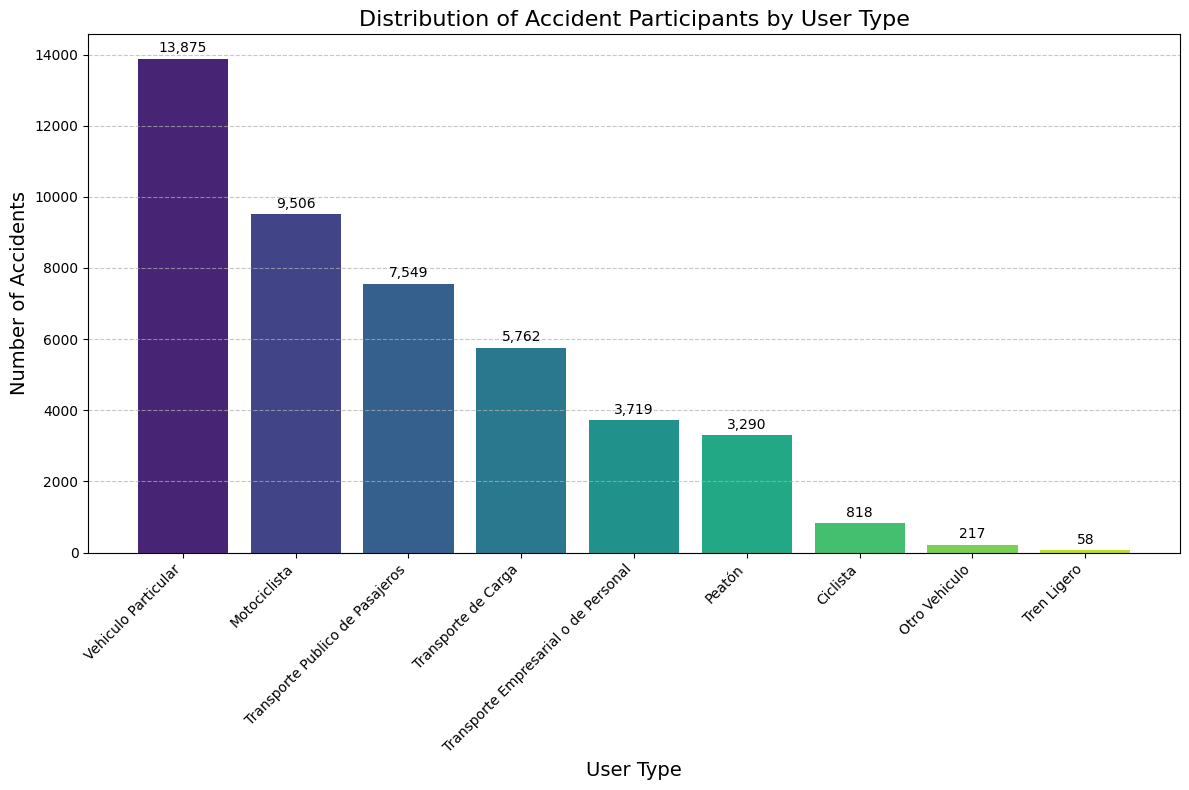

In [27]:
plt.figure(figsize=(12, 8))
user_counts = df['tipo_usuario'].value_counts()
user_counts = user_counts[user_counts > 10]

user_counts = user_counts.sort_values(ascending=False)

colors = sns.color_palette("viridis", len(user_counts))
bars = plt.bar(user_counts.index, user_counts.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Accident Participants by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**User Type vs Consequence**

<Figure size 1400x1000 with 0 Axes>

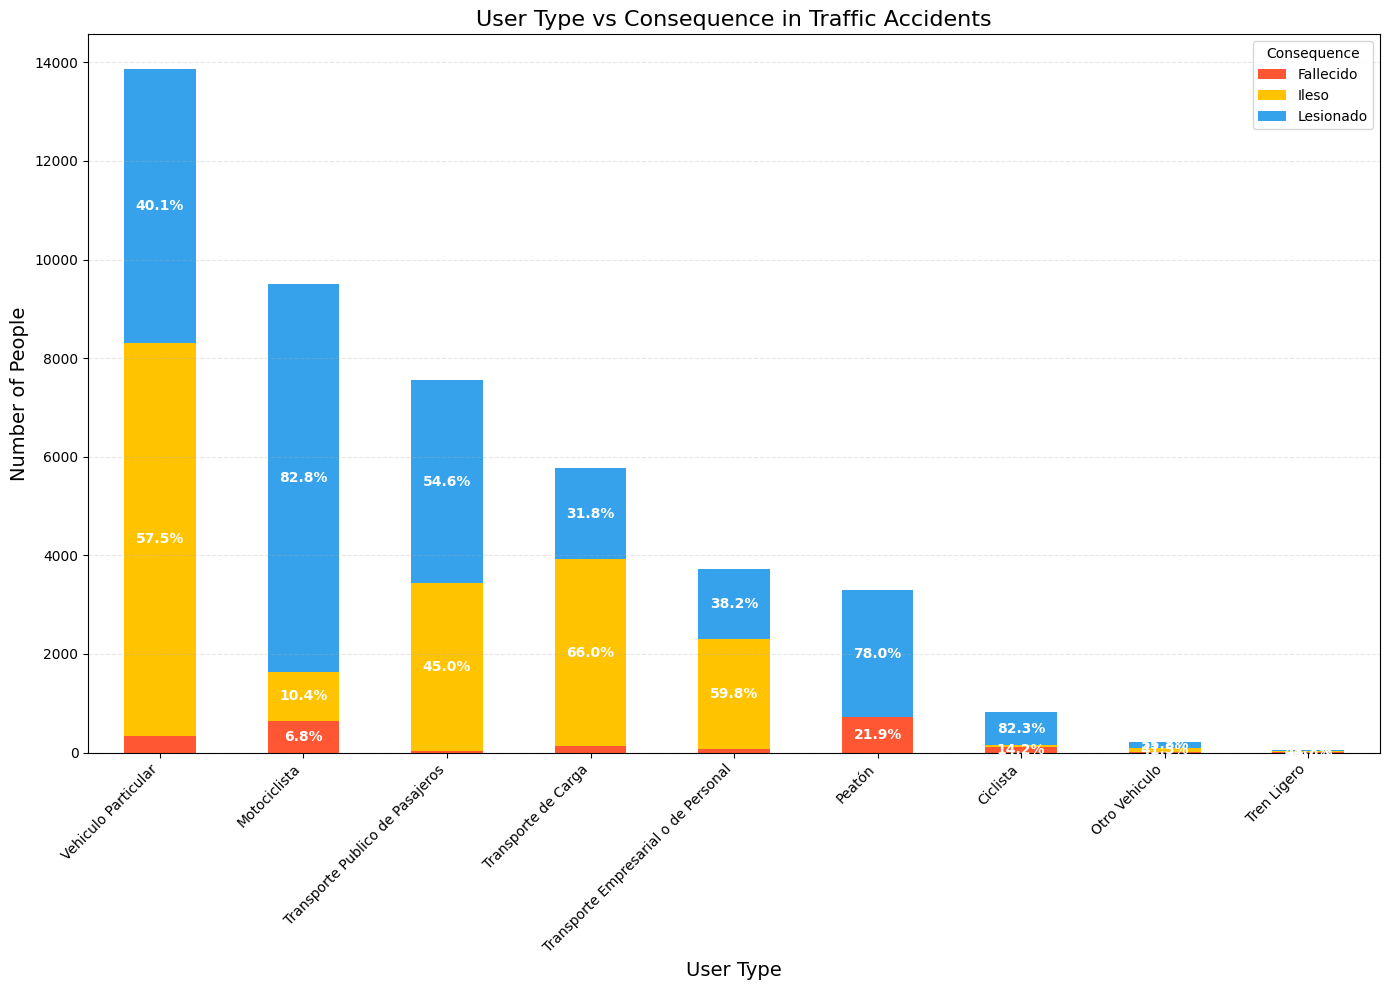

In [28]:
cross_tab = pd.crosstab(df['tipo_usuario'], df['consecuencia'])

main_user_types = user_counts.index


cross_tab = cross_tab.loc[main_user_types]

plt.figure(figsize=(14, 10))
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 10), 
               color=['#FF5733', '#FFC300', '#36A2EB'])

plt.title('User Type vs Consequence in Traffic Accidents', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Consequence")
plt.grid(axis='y', linestyle='--', alpha=0.3)


for i, user_type in enumerate(cross_tab.index):
    total = cross_tab.loc[user_type].sum()
    y_pos = 0
    for consequence in cross_tab.columns:
        value = cross_tab.loc[user_type, consequence]
        percentage = (value / total) * 100
        if percentage > 5:
            plt.text(i, y_pos + (value/2), f"{percentage:.1f}%", 
                     ha='center', va='center', color='white', fontweight='bold')
        y_pos += value

plt.tight_layout()
plt.show()

**Accident Types by User Type**

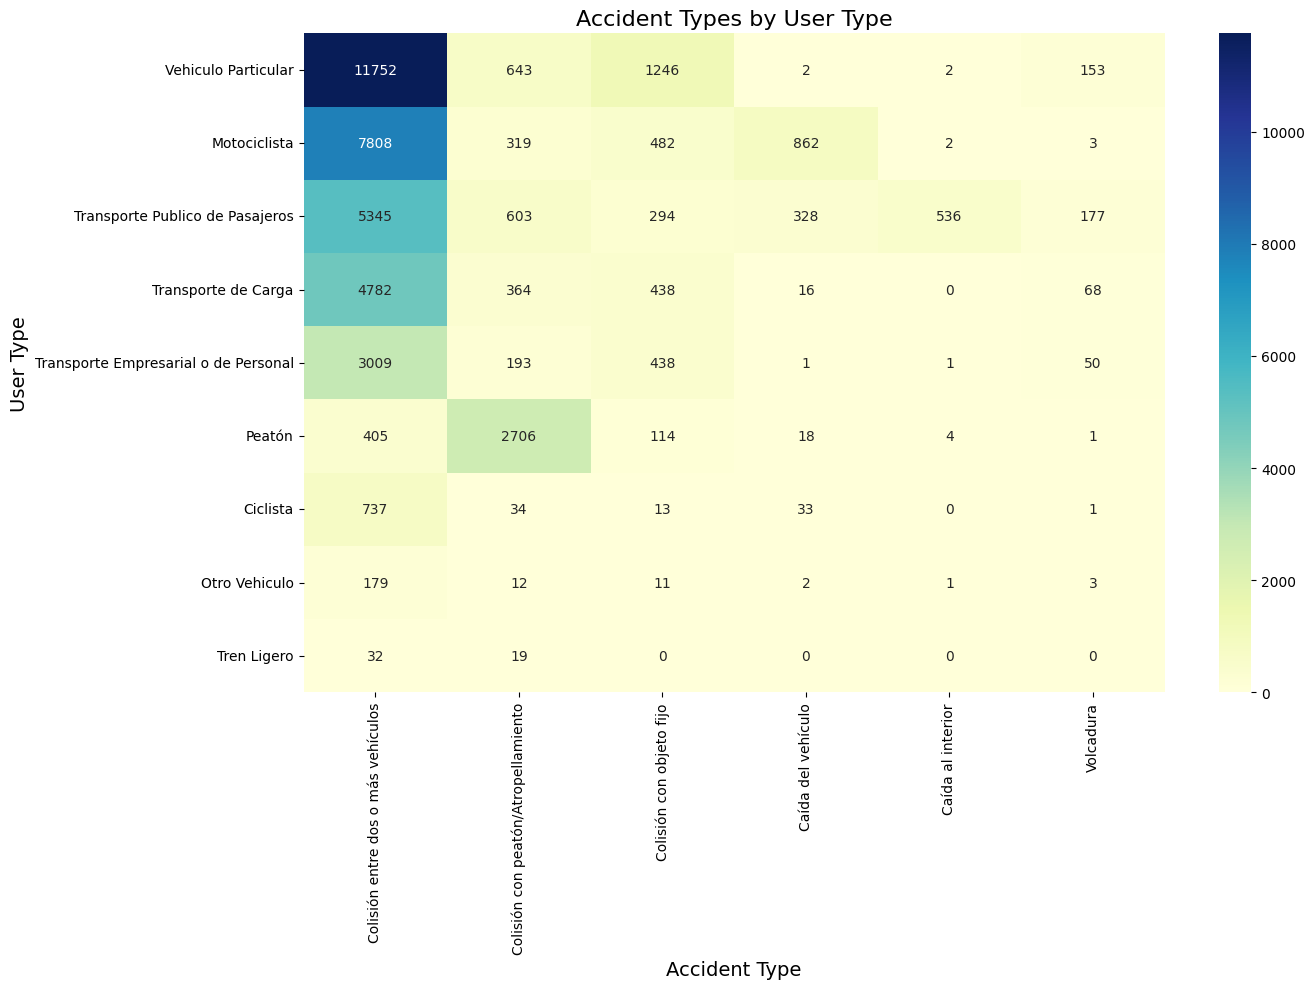

In [29]:
accident_cross_tab = pd.crosstab(df['tipo_usuario'], df['tipo_siniestro'])

main_accident_types = df['tipo_siniestro'].value_counts().nlargest(6).index
accident_cross_tab = accident_cross_tab.loc[main_user_types, main_accident_types]

plt.figure(figsize=(14, 10))
sns.heatmap(accident_cross_tab, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Accident Types by User Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('User Type', fontsize=14)
plt.tight_layout()
plt.show()

**Temporal Distribution by User Type**

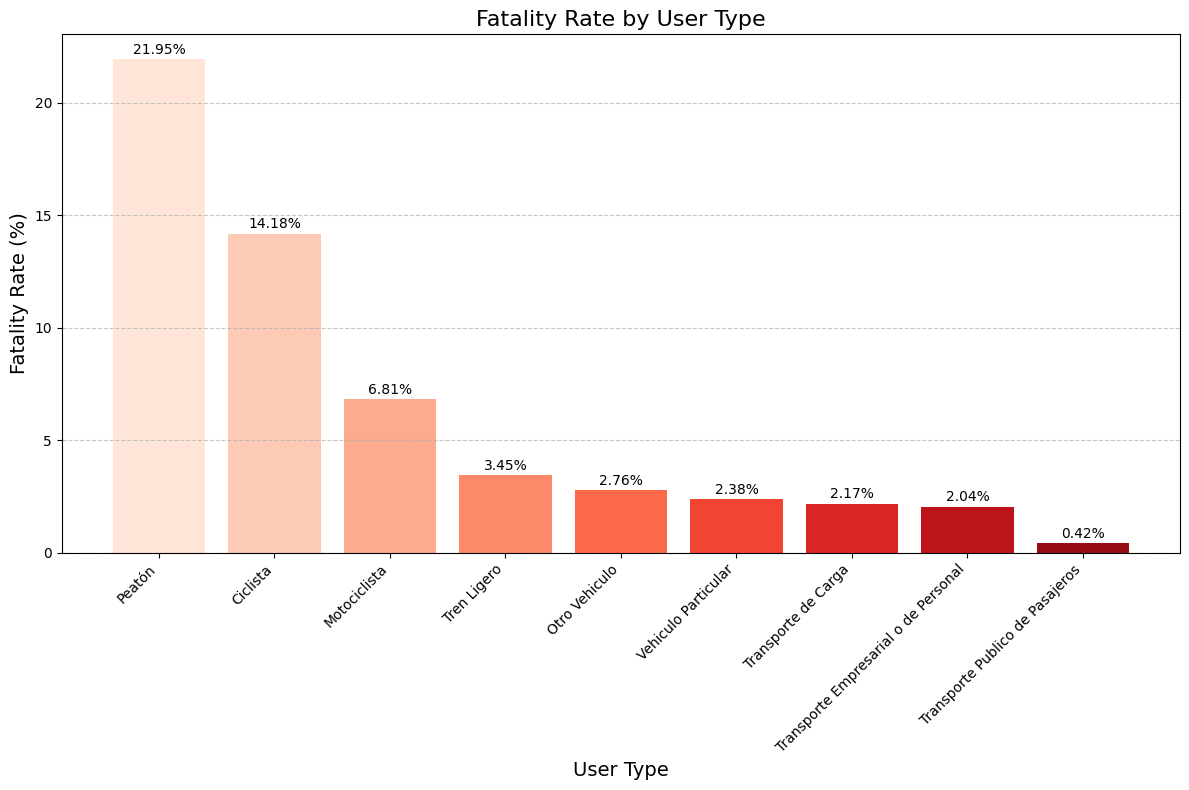

In [30]:
def calculate_fatality_rate(user_type):
    user_data = df[df['tipo_usuario'] == user_type]
    total = len(user_data)
    if total == 0:
        return 0
    fatalities = len(user_data[user_data['consecuencia'] == 'Fallecido'])
    return (fatalities / total) * 100

fatality_rates = {user_type: calculate_fatality_rate(user_type) for user_type in main_user_types}
fatality_df = pd.Series(fatality_rates).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("Reds", len(fatality_df))
bars = plt.bar(fatality_df.index, fatality_df.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Fatality Rate by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Temporal Distribution by User Type**

<Figure size 1400x800 with 0 Axes>

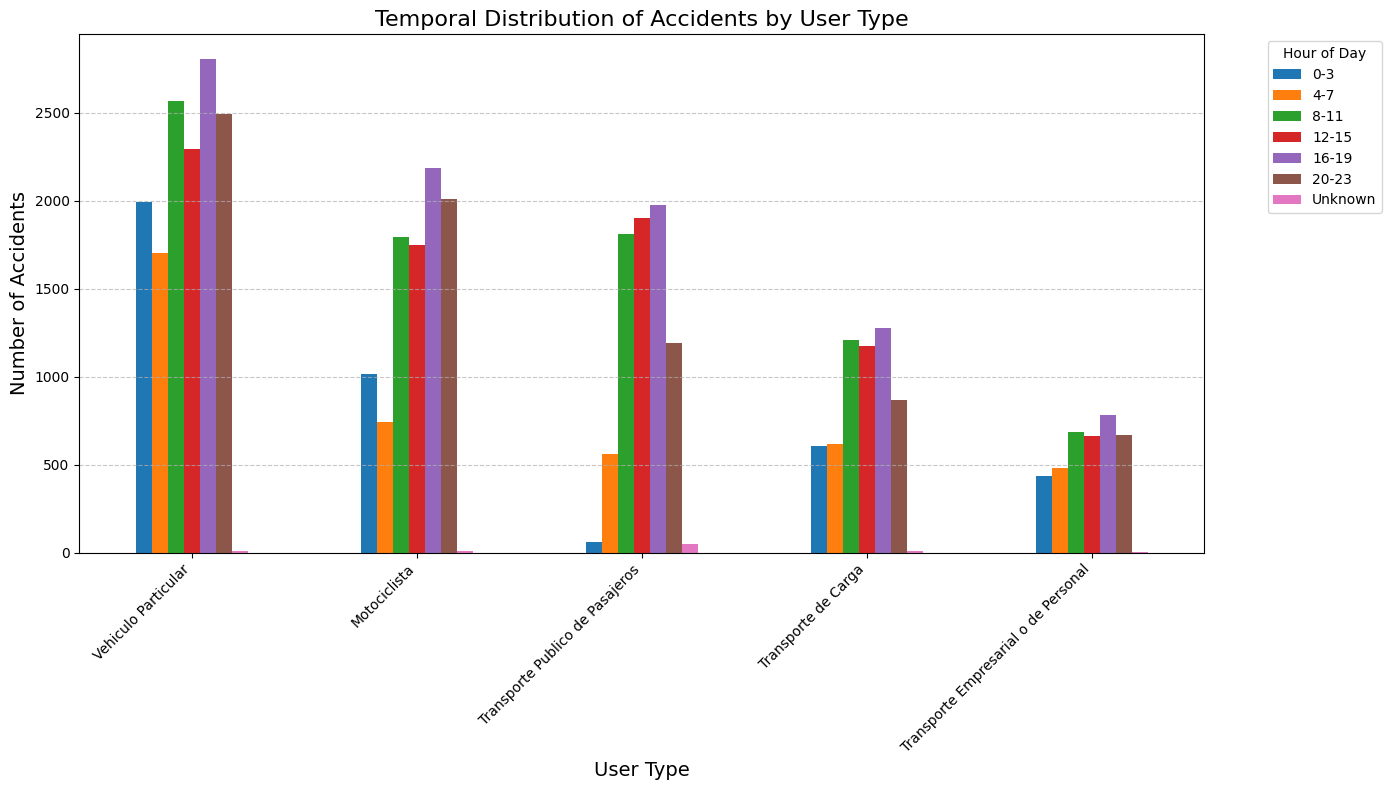

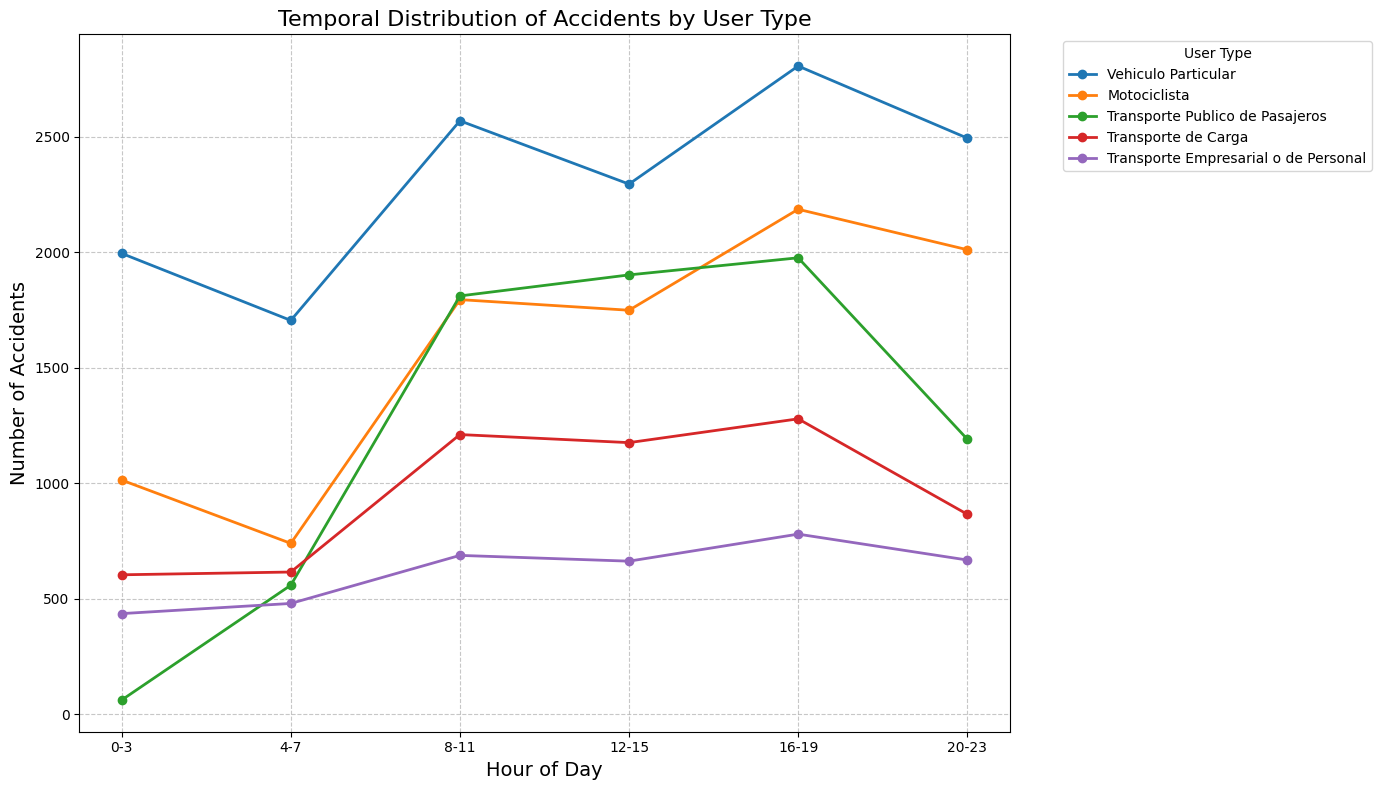

In [31]:
def extract_hour(time_range):
    try:
        if pd.isna(time_range):
            return np.nan
        start_time = time_range.split(' a ')[0]
        hour = int(start_time.split(':')[0])
        return hour
    except:
        return np.nan

df['hour_group'] = df['rango_hora'].apply(extract_hour)

def categorize_hour(hour):
    if pd.isna(hour):
        return 'Unknown'
    elif 0 <= hour < 4:
        return '0-3'
    elif 4 <= hour < 8:
        return '4-7'
    elif 8 <= hour < 12:
        return '8-11'
    elif 12 <= hour < 16:
        return '12-15'
    elif 16 <= hour < 20:
        return '16-19'
    else:
        return '20-23'

df['hour_category'] = df['hour_group'].apply(categorize_hour)

top_user_types = df['tipo_usuario'].value_counts().nlargest(5).index

temporal_cross_tab = pd.crosstab(df['tipo_usuario'], df['hour_category'])

temporal_cross_tab = temporal_cross_tab.loc[top_user_types]

hour_categories = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']
available_categories = [cat for cat in hour_categories if cat in temporal_cross_tab.columns]
if 'Unknown' in temporal_cross_tab.columns:
    available_categories.append('Unknown')
temporal_cross_tab = temporal_cross_tab.reindex(columns=available_categories)

plt.figure(figsize=(14, 8))
temporal_cross_tab.plot(kind='bar', figsize=(14, 8))
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.title('Temporal Distribution of Accidents by User Type', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Hour of Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
line_columns = [col for col in available_categories if col != 'Unknown']
if line_columns: 
    for user_type in top_user_types:
        if user_type in temporal_cross_tab.index:
            plt.plot(line_columns, 
                     temporal_cross_tab.loc[user_type, line_columns], 
                     marker='o', linewidth=2, label=user_type)

    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.title('Temporal Distribution of Accidents by User Type', fontsize=16)
    plt.legend(title="User Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### **4. Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

features = [
    'tipo_siniestro', 
    'condicion_usuario', 
    'tipo_usuario', 
    'sexo', 
    'rango_edad',
    'dia_sem',     
    'rango_hora',  
    'mun'          
]
target = 'consecuencia'

df = df.dropna(subset=[target])
df = df.dropna(subset=features)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Fallecido       0.36      0.11      0.17       316
       Ileso       0.81      0.89      0.85      2807
   Lesionado       0.86      0.85      0.85      3951

    accuracy                           0.83      7074
   macro avg       0.68      0.62      0.62      7074
weighted avg       0.82      0.83      0.82      7074



In [ ]:

single_accident = pd.DataFrame({
    'tipo_siniestro': ['Colisión con vehículo automotor'],
    'condicion_usuario': ['Conductor'],
    'tipo_usuario': ['Automóvil'],
    'sexo': ['Masculino'],
    'rango_edad': ['18-30'],
    'dia_sem': ['Viernes'],
    'rango_hora': ['18:00-23:59'],
    'mun': ['Zapopan']
})

prediction = clf.predict(single_accident)
prediction_proba = clf.predict_proba(single_accident)

print(f"Predicted consequence: {prediction[0]}")
print(f"Prediction probabilities: {prediction_proba[0]}")

Predicted consequence: Ileso
Prediction probabilities: [0.04 0.51 0.45]


In [ ]:

def predict_consequences(new_data):
    predictions = clf.predict(new_data)
    prediction_probas = clf.predict_proba(new_data)
    
    result = new_data.copy()
    result['predicted_consequence'] = predictions

    for i, class_name in enumerate(clf.classes_):
        result[f'prob_{class_name}'] = prediction_probas[:, i]
    
    return result

new_accidents = pd.DataFrame({
    'tipo_siniestro': ['Colisión con vehículo automotor', 'Atropellamiento', 'Volcadura'],
    'condicion_usuario': ['Conductor', 'Peatón', 'Pasajero'],
    'tipo_usuario': ['Automóvil', 'Peatón', 'Motocicleta'],
    'sexo': ['Masculino', 'Femenino', 'Masculino'],
    'rango_edad': ['18-30', '31-45', '46-60'],
    'dia_sem': ['Viernes', 'Sábado', 'Domingo'],
    'rango_hora': ['18:00-23:59', '00:00-05:59', '12:00-17:59'],
    'mun': ['Monterrey', 'Guadalupe', 'San Pedro']
})

predicted_accidents = predict_consequences(new_accidents)
predicted_accidents

,tipo_siniestro,condicion_usuario,tipo_usuario,sexo,rango_edad,dia_sem,rango_hora,mun,predicted_consequence,prob_Fallecido,prob_Ileso,prob_Lesionado
0,Colisión con vehículo automotor,Conductor,Automóvil,Masculino,18-30,Viernes,18:00-23:59,Monterrey,Ileso,0.05,0.51,0.44
1,Atropellamiento,Peatón,Peatón,Femenino,31-45,Sábado,00:00-05:59,Guadalupe,Lesionado,0.11,0.00,0.89
2,Volcadura,Pasajero,Motocicleta,Masculino,46-60,Domingo,12:00-17:59,San Pedro,Lesionado,0.03,0.00,0.97


,feature,importance
8,condicion_usuario_Conductor,0.134799
12,tipo_usuario_Motociclista,0.117063
9,condicion_usuario_Pasajero,0.103681
16,tipo_usuario_Transporte Publico de Pasajeros,0.038889
19,tipo_usuario_Vehiculo Particular,0.038208
17,tipo_usuario_Transporte de Carga,0.022203
20,sexo_Hombre,0.022017
11,tipo_usuario_Ciclista,0.020754
3,tipo_siniestro_Colisión con peatón/Atropellami...,0.019864
10,condicion_usuario_Peatón,0.019019


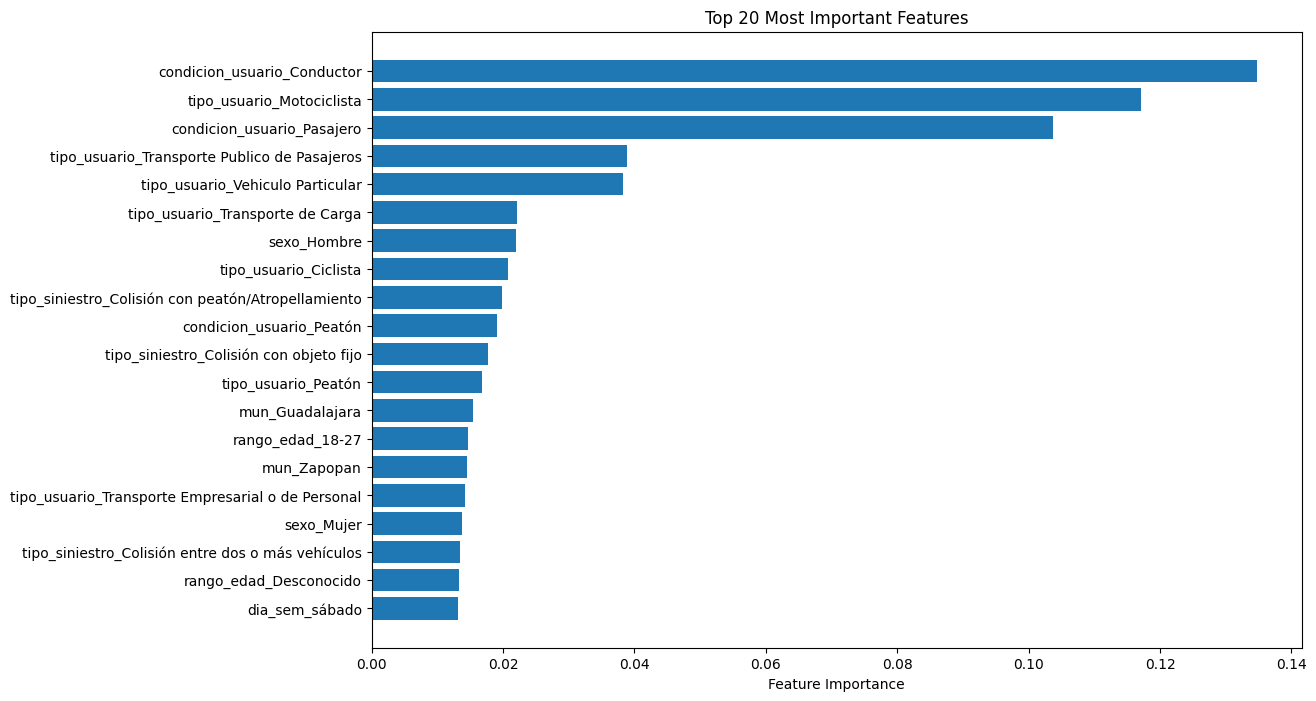

In [47]:
# Extract the one-hot encoder step
onehot = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Get the actual feature names after one-hot encoding
encoded_feature_names = onehot.get_feature_names_out(input_features=categorical_features)

# Convert to a pandas Index for convenience
encoded_feature_names = pd.Index(encoded_feature_names)

# Get feature importances from the random forest
importances = clf.named_steps['classifier'].feature_importances_

# Combine feature names and their importances into a DataFrame
importance_df = pd.DataFrame({'feature': encoded_feature_names, 'importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display the top 20 (optional, you can show all if you prefer)
display(importance_df.head(20))

plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'][:20], importance_df['importance'][:20])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.show()
